In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
plt.style.use(['science'])
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 250
mpl.rcParams.update({'font.size': 8})

import matplotlib.dates as mdates

myFmt = mdates.DateFormatter('%b')


cname = "viridis"

In [2]:
def read_summary(file):
    df = pd.read_csv(file)
    df["time_stamp"] = pd.to_datetime(df["time_stamp"])
    df = df.groupby("time_stamp").sum()
    df = df.rolling("7D").mean()
    return df

def get_mean(baselines, column):
    deaths = np.mean([baseline[column] for baseline in baselines], axis=0)
    deaths_error = np.std([baseline[column] for baseline in baselines], axis=0) / np.sqrt(len(baselines))
    deaths_cumsum = np.mean([baseline[column].cumsum() for baseline in baselines], axis=0)
    deaths_cumsum_error = np.std([baseline[column].cumsum() for baseline in baselines], axis=0) / np.sqrt(len(baselines))
    return deaths, deaths_error, deaths_cumsum, deaths_cumsum_error

In [3]:
files = np.sort(glob("../data/secondary_school_social_distancing/summary*.csv"))[::-1]
summaries = [read_summary(f) for f in files]

In [4]:
baseline_summaries = [read_summary(f) for f in glob("../data/baselines/summary*.csv")]

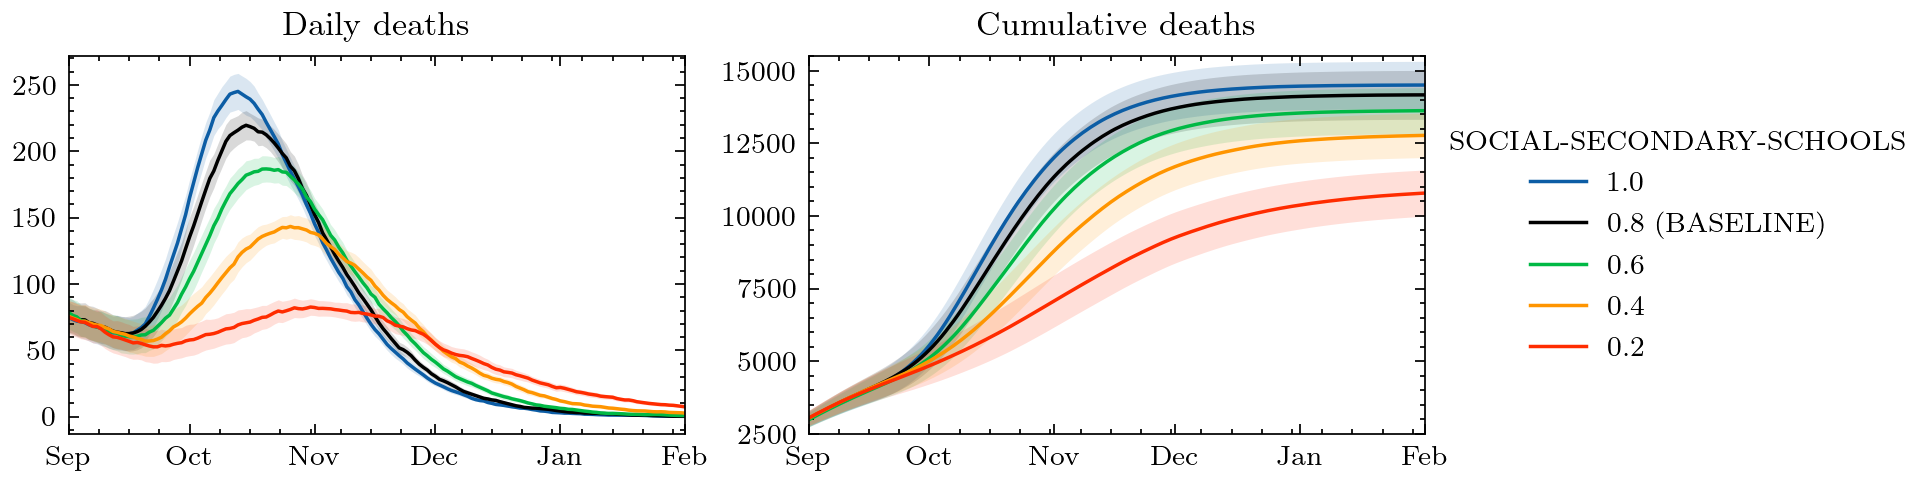

In [5]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7,2))

colors = [f"C{i}" for i in range(4)]

labels = [1.0, 0.8, 0.6, 0.4, 0.2]
alpha = 0.15

for i in range(5):
    if i == 1:
        color = "black"
        label = "0.8 (BASELINE)"
    else:
        if i > 1:
            color = colors[i-1]
        else:
            color = colors[i]
        label = labels[i]
        
    deaths, error, deaths_cumsum, error_cumsum = get_mean(summaries[i*8:8*(i+1)], "daily_deaths")

    ax[0].plot(summaries[0].index, deaths, color = color, label = label)
    ax[0].fill_between(summaries[0].index, deaths-error, deaths+error, linewidth = 0, alpha=alpha, color = color)
    ax[1].plot(summaries[0].index, deaths_cumsum, color = color, label = label)
    ax[1].fill_between(summaries[0].index, deaths_cumsum - error_cumsum, deaths_cumsum + error_cumsum, linewidth = 0, alpha=alpha, color = color)

 
ax[0].xaxis.set_major_formatter(myFmt)
ax[0].set_xlim(pd.to_datetime("2021-09-01"), pd.to_datetime("2022-02-01"))
ax[1].set_ylim(2500, 15500)
ax[1].legend(loc="center left", bbox_to_anchor=(1,0.5), title = "SOCIAL-SECONDARY-SCHOOLS")
ax[0].set_title("Daily deaths")
ax[1].set_title("Cumulative deaths")
fig.savefig("../figures/Fig7_secondary_schools.pdf")